In [1]:
#import libers 
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
#Let's start with importing necessary libraries
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


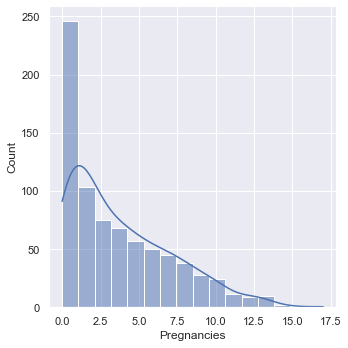

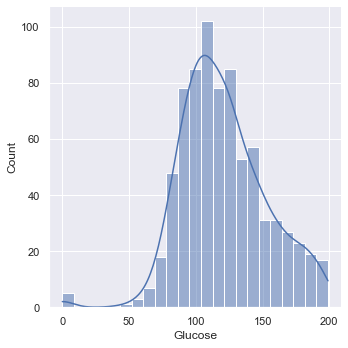

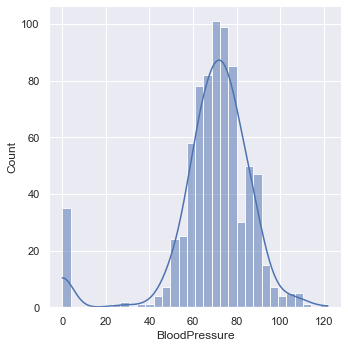

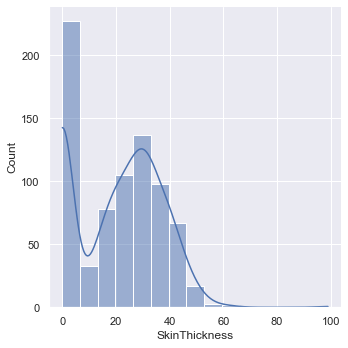

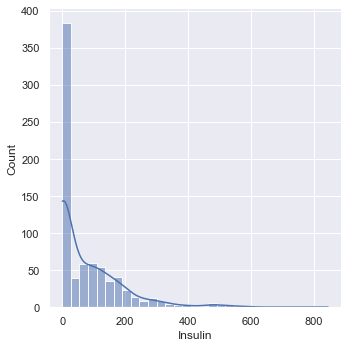

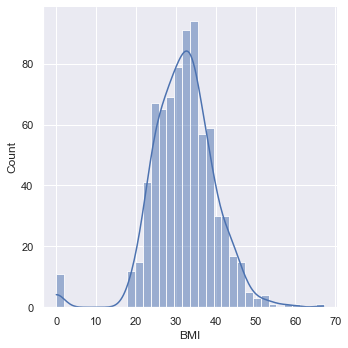

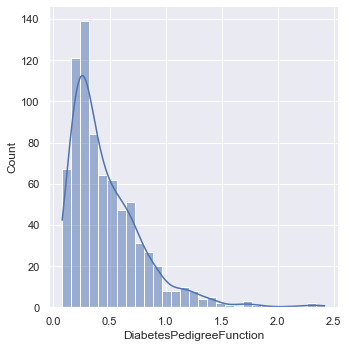

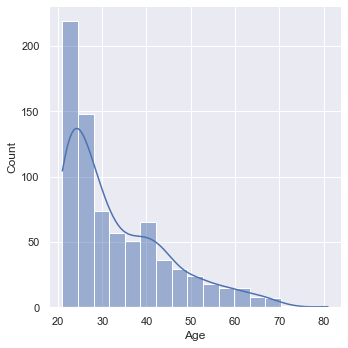

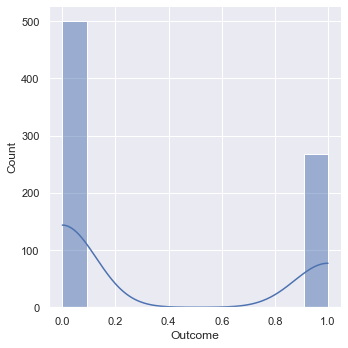

In [4]:
for i in df:
    sns.displot(df, x=df[i],kde=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
l = df[['Pregnancies','DiabetesPedigreeFunction','Outcome']]

In [7]:
# replacing zero values with the mean of the column
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())

In [8]:
for i in df.columns:
    try :
        men  = df[i].mean()
        if df[i] in l:
            pass
        else:
            df[i]= df[i].replace(0,men)
    except TypeError:
        print("TypeError: Check list of indices")

TypeError: Check list of indices
TypeError: Check list of indices
TypeError: Check list of indices
TypeError: Check list of indices
TypeError: Check list of indices
TypeError: Check list of indices
TypeError: Check list of indices
TypeError: Check list of indices
TypeError: Check list of indices


In [9]:
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


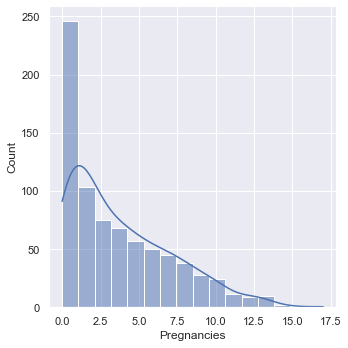

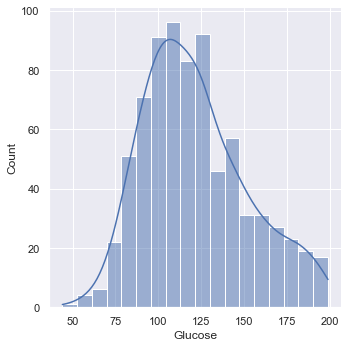

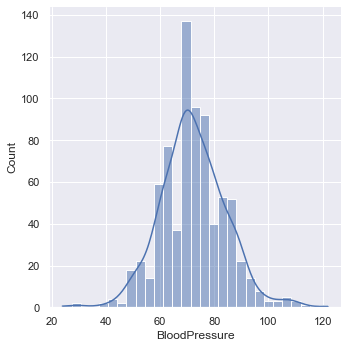

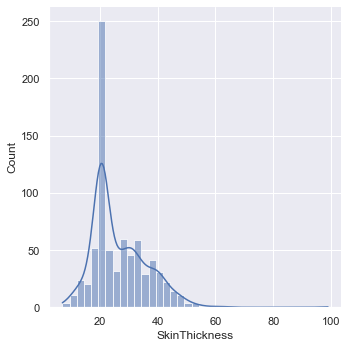

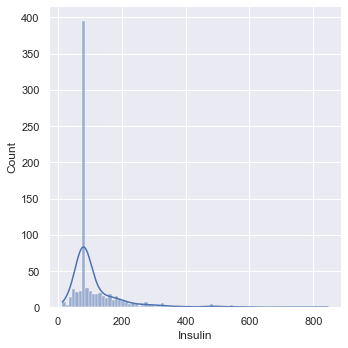

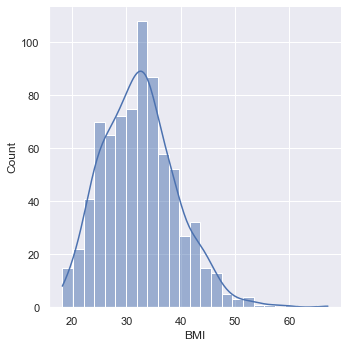

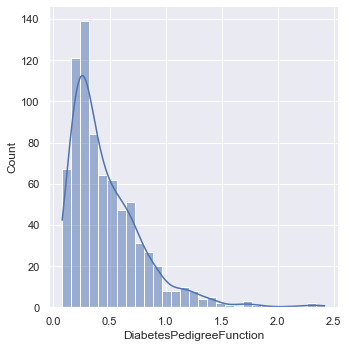

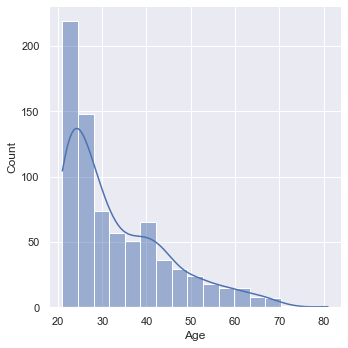

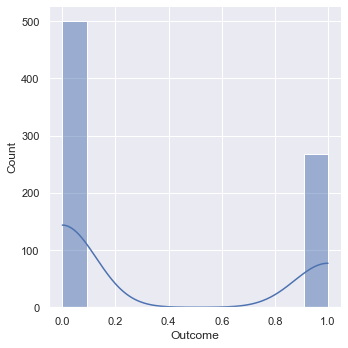

In [10]:
for i in df:
    sns.displot(df, x=df[i],kde=True)

<AxesSubplot:>

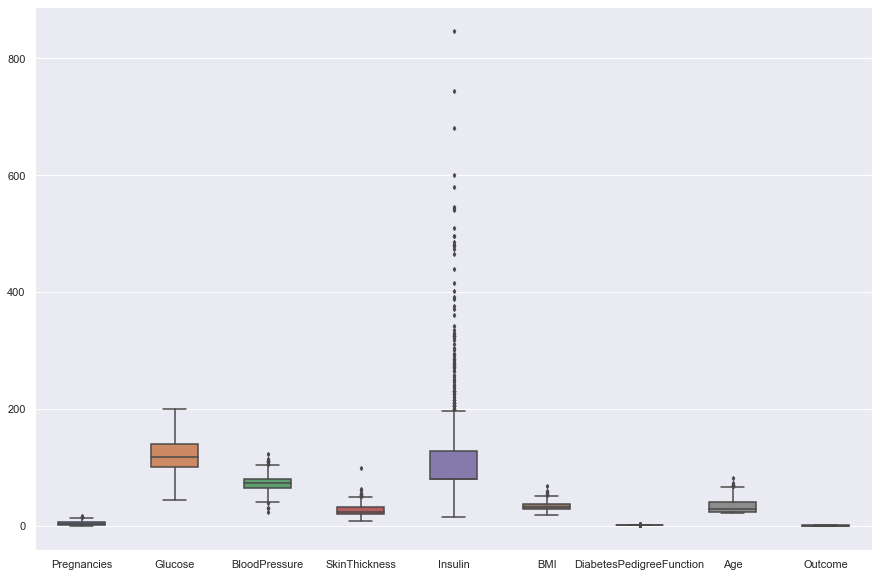

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)


In [12]:
q = df['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = df[df['Pregnancies']<q]
q = data_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]
q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]
q = data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]
q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

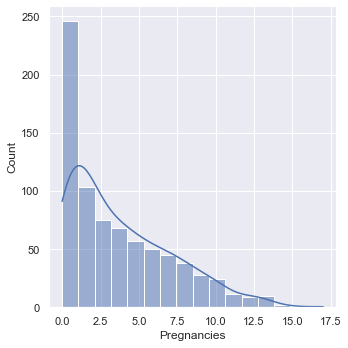

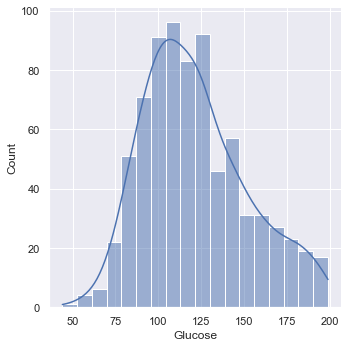

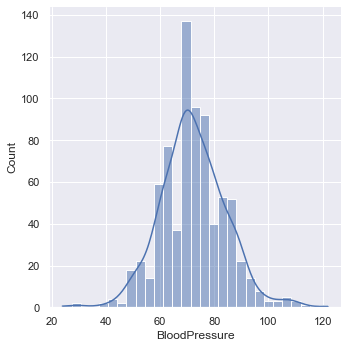

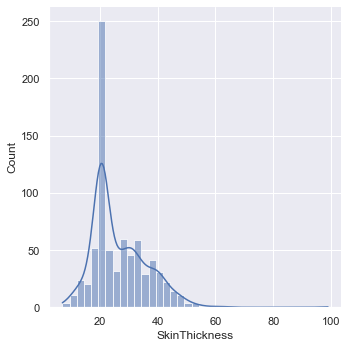

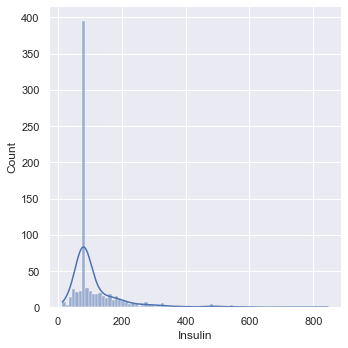

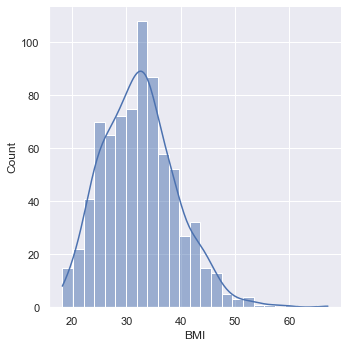

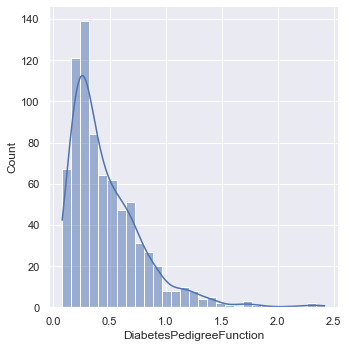

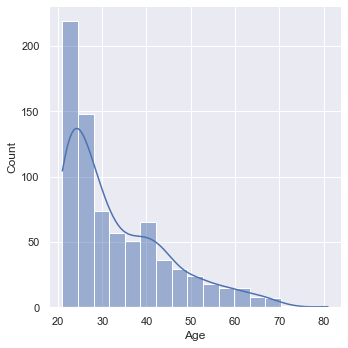

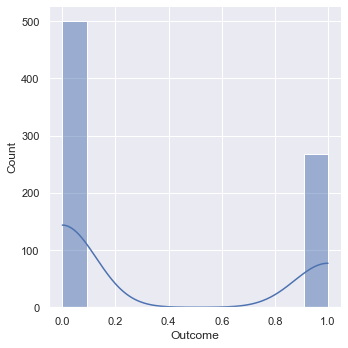

In [13]:
for i in df:
    sns.displot(df, x=df[i],kde=True)

In [14]:
X = df.drop(columns = ['Outcome'])
y = df['Outcome']

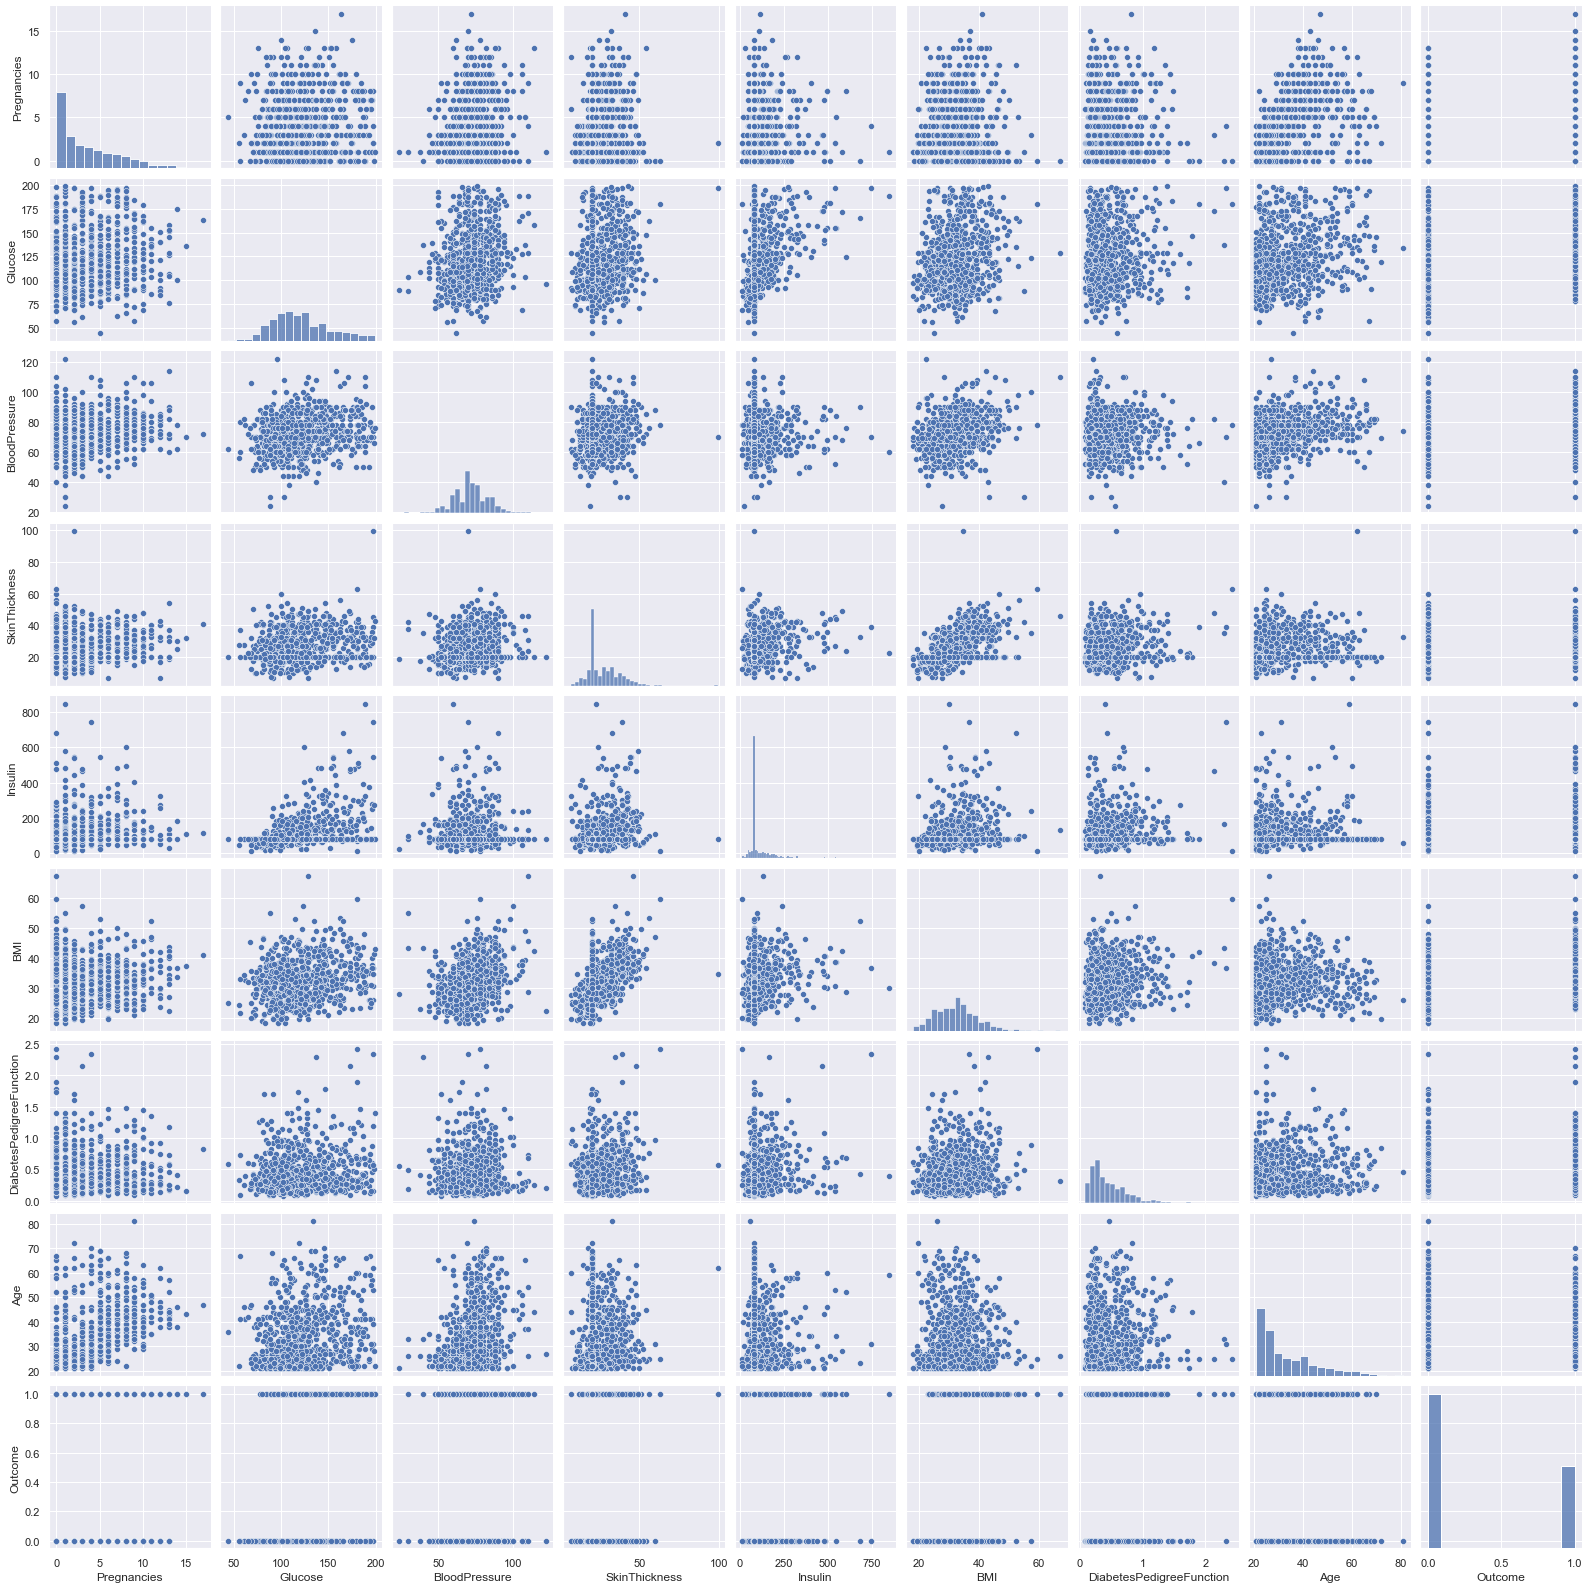

In [15]:
sns.pairplot(df)

In [16]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [17]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns


In [18]:
vif

,vif,Features
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


In [19]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25)

In [20]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [21]:
knn.score(x_train,y_train)

0.8159722222222222

In [22]:
y_pred = knn.predict(x_test)

In [23]:
knn.score(x_train,y_train)

0.8159722222222222

In [24]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [25]:
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [26]:
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.733 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.704 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.713 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.748 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.739 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.733 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.722 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.704 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.739 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.730 total 

[CV 5/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=5;, score=0.730 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=7;, score=0.733 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=7;, score=0.730 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=7;, score=0.722 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=7;, score=0.748 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=7;, score=0.739 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=9;, score=0.741 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=9;, score=0.713 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=9;, score=0.722 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=9;, score=0.730 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=27, n_

[CV 4/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=9;, score=0.730 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=9;, score=0.730 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=10;, score=0.750 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=10;, score=0.713 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=10;, score=0.696 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=10;, score=0.748 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=10;, score=0.730 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=11;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=11;, score=0.748 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=11;, score=0.687 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_siz

[CV 2/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=11;, score=0.748 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=11;, score=0.687 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=11;, score=0.774 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=11;, score=0.713 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=12;, score=0.759 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=12;, score=0.722 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=12;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=12;, score=0.774 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=12;, score=0.739 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=13;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=13

[CV 2/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=11;, score=0.748 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=11;, score=0.687 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=11;, score=0.774 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=11;, score=0.713 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=12;, score=0.759 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=12;, score=0.722 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=12;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=12;, score=0.774 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=12;, score=0.739 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=13;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=13

[CV 1/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=13;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=13;, score=0.783 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=13;, score=0.713 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=13;, score=0.757 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=13;, score=0.722 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=3;, score=0.733 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=3;, score=0.704 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=3;, score=0.713 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=3;, score=0.748 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=3;, score=0.739 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=5;, sco

[CV 5/5] END algorithm=brute, leaf_size=20, n_neighbors=13;, score=0.722 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=25, n_neighbors=3;, score=0.733 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=25, n_neighbors=3;, score=0.704 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=25, n_neighbors=3;, score=0.713 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=25, n_neighbors=3;, score=0.748 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=25, n_neighbors=3;, score=0.739 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=25, n_neighbors=5;, score=0.733 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=25, n_neighbors=5;, score=0.722 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=25, n_neighbors=5;, score=0.704 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=25, n_neighbors=5;, score=0.739 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=25, n_neighbors=5;, score=0.730 total time=   0.0

[CV 5/5] END algorithm=brute, leaf_size=32, n_neighbors=3;, score=0.739 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=32, n_neighbors=5;, score=0.733 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=32, n_neighbors=5;, score=0.722 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=32, n_neighbors=5;, score=0.704 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=32, n_neighbors=5;, score=0.739 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=32, n_neighbors=5;, score=0.730 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=32, n_neighbors=7;, score=0.733 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=32, n_neighbors=7;, score=0.730 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=32, n_neighbors=7;, score=0.722 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=32, n_neighbors=7;, score=0.748 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=32, n_neighbors=7;, score=0.739 total time=   0.0s

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             verbose=3)

In [27]:
gridsearch.best_params_


{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 13}

In [28]:
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =13)

In [29]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=13)

In [30]:
knn.score(x_train,y_train)

0.8003472222222222

In [31]:
knn.score(x_test,y_test)

0.7708333333333334

In [33]:
#k-fold cross validation 
kfold = KFold(n_splits=12,random_state= 42,shuffle=True)
kfold.get_n_splits(X_scaled)

12

In [34]:
from statistics import mean
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =11)
cnt =0
count=[]
train_score =[]
test_score = []

for train_index,test_index in kfold.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index] # our scaled data is an array so it can work on x[value]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] # y is a dataframe so we have to use "iloc" to retreive data
    knn.fit(X_train,y_train)
    train_score_ = knn.score(X_train,y_train)
    test_score_ =  knn.score(X_test,y_test)
    cnt+=1
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    print("for k = ", cnt)
    print("train_score is :  ", train_score_, "and test score is :  ", test_score_)
print("************************************************")
print("************************************************")
print("Average train score is :  ", mean(train_score))
print("Average test score is :  ", mean(test_score))

for k =  1
train_score is :   0.7982954545454546 and test score is :   0.6875
for k =  2
train_score is :   0.7855113636363636 and test score is :   0.84375
for k =  3
train_score is :   0.8011363636363636 and test score is :   0.703125
for k =  4
train_score is :   0.8039772727272727 and test score is :   0.75
for k =  5
train_score is :   0.7883522727272727 and test score is :   0.84375
for k =  6
train_score is :   0.8068181818181818 and test score is :   0.734375
for k =  7
train_score is :   0.7911931818181818 and test score is :   0.765625
for k =  8
train_score is :   0.8068181818181818 and test score is :   0.65625
for k =  9
train_score is :   0.7940340909090909 and test score is :   0.828125
for k =  10
train_score is :   0.8025568181818182 and test score is :   0.75
for k =  11
train_score is :   0.7897727272727273 and test score is :   0.75
for k =  12
train_score is :   0.796875 and test score is :   0.71875
************************************************
****************

([<matplotlib.axis.YTick at 0x232181c2100>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

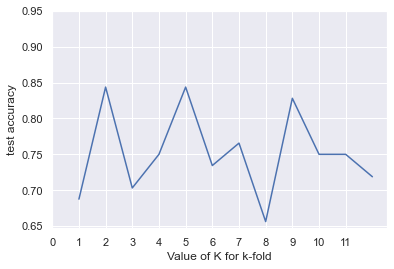

In [35]:
plt.plot(count,test_score)
plt.xlabel('Value of K for k-fold')
plt.ylabel('test accuracy')
plt.xticks(np.arange(0, 12, 1)) 
plt.yticks(np.arange(0.65, 1, 0.05)) 


In [37]:
X_scaled

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [38]:
import pickle
filename = 'knn_model_for_predection.pickle'
pickle.dump(knn, open(filename, 'wb'))
import pickle
filename = 'knnStander_Sclar.pickle'
pickle.dump(scalar, open(filename, 'wb'))